In [30]:
import itertools
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputRegressor


In [31]:
CSV_FILE_PATH = '../Datasets/ultimate_color.csv'
CSV_FILE_PATH_VAL = '../Datasets/ultimate_color_test.csv'
# load the training dataset
lesion = pd.read_csv(CSV_FILE_PATH, usecols=lambda x: 'Unnamed' not in x)
lesion_val = pd.read_csv(CSV_FILE_PATH_VAL, usecols=lambda x: 'Unnamed' not in x)
# Display a random sample of 10 observations
sample = lesion.sample(10)

print(f"Shape of data: {sample.shape}")
sample


Shape of data: (10, 109)


,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,mean_b,mean_g,mean_r,std_b,std_g,std_r,category
22107,70.0,169.0,1.210168e+09,2.499502,57.0,2.057196,194.0,123.144269,30.136823,127.0,...,0.015499,73640.0,0.842839,23.463263,41.568296,42.275407,42.129073,70.626697,71.696994,2
32812,91.0,153.0,4.999477e+08,1.789873,26.0,3.342156,182.0,130.013172,17.953938,138.0,...,0.023485,28697.0,0.891044,9.384056,15.939530,10.774367,27.410353,47.248591,31.932310,5
15946,87.0,147.0,2.997228e+08,1.760408,27.0,3.887183,198.0,124.802271,18.338364,133.0,...,0.030208,18586.0,0.860791,7.729341,9.487244,10.094533,28.968840,35.457380,37.916176,1
648,120.0,152.0,2.232703e+09,1.311923,16.0,6.084109,172.0,137.856568,10.711290,141.0,...,0.014025,116250.0,0.741346,36.243904,59.342319,45.597496,42.316160,69.006440,53.754439,2
1967,94.0,151.0,5.453112e+08,1.677513,19.0,5.804450,162.0,131.320920,17.195939,139.0,...,0.030197,30612.0,0.670954,11.974693,13.818107,21.140067,34.259071,39.482776,60.641653,6
36027,75.0,160.0,8.352585e+08,2.222206,52.0,2.175652,179.0,125.194719,26.960397,134.0,...,0.017703,50108.0,0.894574,17.854270,28.021711,21.825244,40.058534,60.483267,46.564578,5
6437,40.0,155.0,5.593665e+08,2.546200,83.0,1.724536,185.0,89.594693,39.075491,81.0,...,0.017386,56118.0,0.860722,25.906344,38.606181,36.660359,54.133939,78.140535,74.509423,4
21155,163.0,193.0,2.040026e+09,1.145940,17.0,4.661050,211.0,178.250892,9.851736,180.0,...,0.015754,63880.0,0.890318,11.453856,20.356737,26.498493,21.298360,37.171138,48.274856,2
13959,122.0,199.0,2.227488e+09,2.224671,49.0,2.267099,236.0,165.159453,25.863850,172.0,...,0.014483,79045.0,0.870573,19.596648,30.333622,25.692444,33.827860,50.142416,43.473922,0
29426,70.0,165.0,1.836088e+09,2.482361,63.0,1.869445,195.0,114.375424,31.405223,108.0,...,0.014816,127693.0,0.669585,45.314641,76.014567,77.291722,51.348197,84.708965,86.851596,6


In [32]:
lesion_classes = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc', 'mel']


In [33]:
# Count the number of null values for each column
lesion.isnull().sum()


original_firstorder_10Percentile          0
original_firstorder_90Percentile          0
original_firstorder_Energy                0
original_firstorder_Entropy               0
original_firstorder_InterquartileRange    0
                                         ..
mean_r                                    0
std_b                                     0
std_g                                     0
std_r                                     0
category                                  0
Length: 109, dtype: int64

In [34]:
# Show rows containing nulls
lesion[lesion.isnull().any(axis=1)]


,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,mean_b,mean_g,mean_r,std_b,std_g,std_r,category


In [35]:
# Drop rows containing NaN values
lesion=lesion.dropna()
#Confirm there are now no nulls
lesion.isnull().sum()


original_firstorder_10Percentile          0
original_firstorder_90Percentile          0
original_firstorder_Energy                0
original_firstorder_Entropy               0
original_firstorder_InterquartileRange    0
                                         ..
mean_r                                    0
std_b                                     0
std_g                                     0
std_r                                     0
category                                  0
Length: 109, dtype: int64

In [36]:
lesion_features = [
'original_glcm_MaximumProbability',
'original_glrlm_LongRunHighGrayLevelEmphasis',
'original_glrlm_LowGrayLevelRunEmphasis',
'original_glszm_LargeAreaEmphasis',
'original_glszm_LargeAreaLowGrayLevelEmphasis',
'original_glszm_ZoneEntropy', 'original_shape2D_Sphericity',
'original_firstorder_90Percentile_r',
'original_firstorder_Kurtosis_r', 'original_firstorder_Skewness_r',
'original_glcm_ClusterShade_r', 'original_glcm_MCC_r',
'original_gldm_LargeDependenceLowGrayLevelEmphasis_r',
'original_gldm_SmallDependenceEmphasis_r',
'original_glrlm_LongRunEmphasis_r',
'original_glrlm_LongRunLowGrayLevelEmphasis_r',
'original_glrlm_ShortRunEmphasis_r',
'original_glrlm_ShortRunLowGrayLevelEmphasis_r',
'original_glszm_LargeAreaHighGrayLevelEmphasis_r',
'original_glszm_LargeAreaLowGrayLevelEmphasis_r',
'original_glszm_SizeZoneNonUniformity_r',
'original_glszm_SmallAreaEmphasis_r',
'original_glszm_SmallAreaLowGrayLevelEmphasis_r',
'original_glszm_ZoneVariance_r', 'original_ngtdm_Busyness_r',
'original_ngtdm_Coarseness_r', 'original_ngtdm_Strength_r',
'original_shape2D_MeshSurface_r',
'original_shape2D_PixelSurface_r', 'original_shape2D_Sphericity_r',
'original_firstorder_10Percentile_g',
'original_firstorder_InterquartileRange_g',
'original_glcm_ClusterShade_g', 'original_glcm_MCC_g',
'original_glcm_MaximumProbability_g',
'original_gldm_SmallDependenceHighGrayLevelEmphasis_g',
'original_glrlm_LongRunHighGrayLevelEmphasis_g',
'original_glrlm_LongRunLowGrayLevelEmphasis_g',
'original_glszm_ZoneEntropy_g', 'original_shape2D_MeshSurface_g',
'original_shape2D_PixelSurface_g',
'original_firstorder_Kurtosis_b',
'original_glcm_ClusterProminence_b',
'original_glcm_ClusterShade_b',
'original_gldm_DependenceNonUniformityNormalized_b',
'original_gldm_LargeDependenceHighGrayLevelEmphasis_b',
'original_glrlm_RunLengthNonUniformity_b',
'original_glszm_LargeAreaEmphasis_b',
'original_glszm_LargeAreaHighGrayLevelEmphasis_b',
'original_ngtdm_Busyness_b', 'original_ngtdm_Coarseness_b',
'original_shape2D_MeshSurface_b',
'original_shape2D_PixelSurface_b'
]
lesion_label = 'category'
#for col in lesion:
    #lesion.boxplot(column=col, by=lesion_label, figsize=(6,6))
    #plt.title(col)
#plt.show()


In [37]:
# Separate features and labels
x_lesion_train, y_lesion_train = lesion[lesion_features].values, lesion[lesion_label].values
x_lesion_test, y_lesion_test = lesion_val[lesion_features].values, lesion_val[lesion_label].values

# Split data 70%-30% into training set and test set
#x_lesion_train, x_lesion_test, y_lesion_train, y_lesion_test = train_test_split(lesion_X, lesion_y,
                                                                                    #test_size=0.20,
                                                                                    #random_state=0,
                                                                                    #stratify=lesion_y)



print ('Training Set: %d, Test Set: %d \n' % (x_lesion_train.size, x_lesion_test.size))


Training Set: 1285744, Test Set: 37502 



In [38]:
# Set regularization rate
reg = 0.1

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = list(range(len(lesion_features)))
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

#Create preprocessing and training pipeline
#pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('logregressor', MultiOutputRegressor(XGBRegressor(objective='reg:linear')))])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="lbfgs", multi_class='auto', max_iter=10000000000))])


In [39]:
multi_model = pipeline.fit(x_lesion_train, (y_lesion_train))
print (multi_model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...])])),
                ('logregressor',
                 LogisticRegression(C=10.0, max_iter=10000000000))])


In [40]:
# Set regularization rate
#reg = 0.1

# train a logistic regression model on the training set
#multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_lesion_train, y_lesion_train)
#print (multi_model)


In [41]:
lesion_predictions = multi_model.predict(x_lesion_test)
print('Predicted labels: ', lesion_predictions[:15])
print('Actual labels   : ' ,y_lesion_test[:15])


Predicted labels:  [4 4 4 4 6 1 4 0 4 1 4 6 4 4 4]
Actual labels   :  [4 4 6 0 4 2 4 0 2 1 4 4 4 4 4]


In [42]:
print(classification_report(y_lesion_test, lesion_predictions))


              precision    recall  f1-score   support

           0       0.63      0.40      0.49        30
           1       0.46      0.51      0.49        35
           2       0.60      0.45      0.52        88
           3       0.06      0.88      0.11         8
           4       0.98      0.70      0.82       883
           5       0.10      0.85      0.18        13
           6       0.24      0.61      0.34        46

    accuracy                           0.67      1103
   macro avg       0.44      0.63      0.42      1103
weighted avg       0.88      0.67      0.74      1103



In [43]:
report = classification_report(y_lesion_test, lesion_predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.astype({'support':'int'})
report_df = report_df.rename(columns={'precision': 'precyzja', 'recall': 'czułość', 'f1-score': 'miara F1', 'support': 'poparcie'})
report_df = report_df.drop('accuracy')
report_df = report_df.drop('macro avg')
report_df = report_df.drop('weighted avg')


In [44]:
display(report_df)

,precyzja,czułość,miara F1,poparcie
0,0.631579,0.400000,0.489796,30
1,0.461538,0.514286,0.486486,35
2,0.597015,0.454545,0.516129,88
3,0.057851,0.875000,0.108527,8
4,0.984102,0.701019,0.818783,883
5,0.100000,0.846154,0.178862,13
6,0.237288,0.608696,0.341463,46


In [45]:
import dataframe_image as dfi
dfi.export(report_df, "table.png", table_conversion='matplotlib')

In [46]:
print("Overall Accuracy:",accuracy_score(y_lesion_test, lesion_predictions))
print("Overall Precision:",precision_score(y_lesion_test, lesion_predictions, average='macro'))
print("Overall Recall:",recall_score(y_lesion_test, lesion_predictions, average='macro'))


Overall Accuracy: 0.6663644605621033
Overall Precision: 0.43848192262146996
Overall Recall: 0.6285285599581513


In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [48]:
# Print the confusion matrix
mcm = confusion_matrix(y_lesion_test, lesion_predictions)
print(mcm)


[[ 12   6   2   3   1   0   6]
 [  4  18   1  10   0   0   2]
 [  0   4  40  18   5   2  19]
 [  0   0   0   7   0   0   1]
 [  2  10  16  80 619  94  62]
 [  0   0   0   1   1  11   0]
 [  1   1   8   2   3   3  28]]


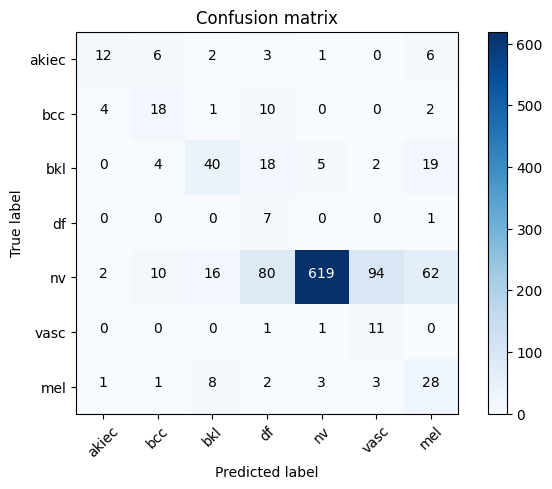

In [49]:
# plot the confusion matrix
plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc','mel']
plot_confusion_matrix(mcm, plot_labels)


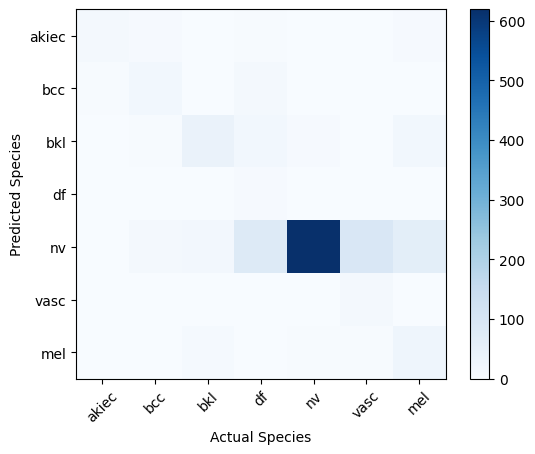

In [50]:
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(lesion_classes))
plt.xticks(tick_marks, lesion_classes, rotation=45)
plt.yticks(tick_marks, lesion_classes)
plt.xlabel("Actual Species")
plt.ylabel("Predicted Species")
plt.show()


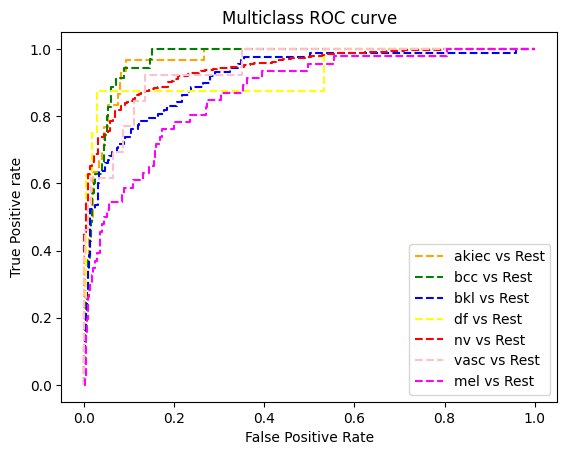

In [51]:
# Get class probability scores
lesion_prob = multi_model.predict_proba(x_lesion_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(lesion_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_lesion_test, lesion_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=lesion_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=lesion_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=lesion_classes[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label=lesion_classes[3] + ' vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label=lesion_classes[4] + ' vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='pink', label=lesion_classes[5] + ' vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='magenta', label=lesion_classes[6] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


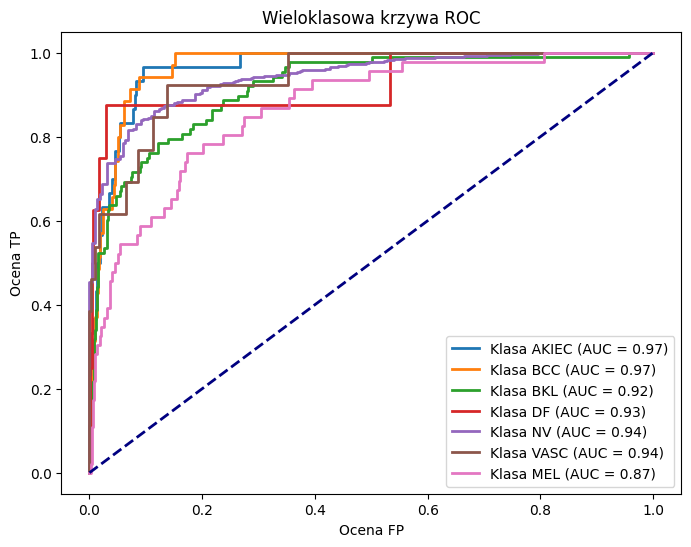

In [52]:
y_true_bin = label_binarize(y_lesion_test, classes=np.arange(7))
lesion_classes = ['AKIEC', 'BCC', 'BKL', 'DF', 'NV', 'VASC', 'MEL']
# Compute ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(7):
    fpr, tpr, thresholds = roc_curve(y_true_bin[:, i], lesion_prob[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Klasa {lesion_classes[i]} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Ocena FP')
plt.ylabel('Ocena TP')
plt.title('Wieloklasowa krzywa ROC')
plt.legend(loc='lower right')
plt.show()


In [53]:
auc = roc_auc_score(y_lesion_test, lesion_prob, multi_class='ovr')
print('Average AUC:', auc)


Average AUC: 0.9320294401271515


Text(0, 0.5, 'Fraction classified incorrectly')

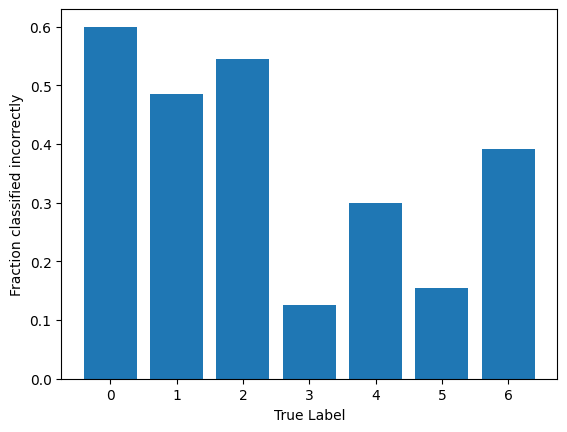

In [54]:
label_frac_error = 1 - np.diag(mcm) / np.sum(mcm, axis=1)
plt.bar(np.arange(7),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')


In [55]:
# Save the model as a pickle file
#filename = 'penguin_model.pkl'
#joblib.dump(multi_model, filename) 


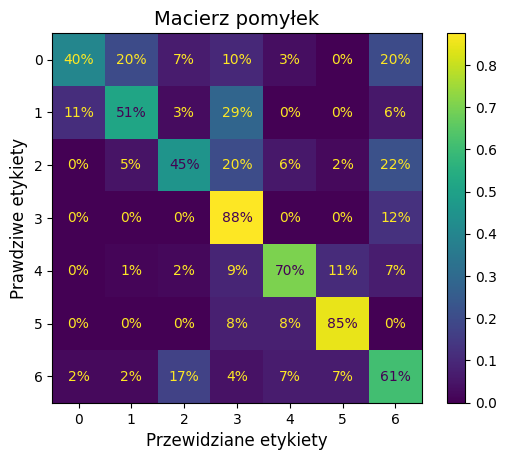

In [56]:
ConfusionMatrixDisplay.from_predictions(y_lesion_test, lesion_predictions, normalize='true', values_format=".0%")
# Customize axis labels
plt.xlabel('Przewidziane etykiety', fontsize=12)
plt.ylabel('Prawdziwe etykiety', fontsize=12)
plt.title('Macierz pomyłek', fontsize=14)

# Show the plot
plt.show()

In [57]:
# Load the model from the file
#multi_model = joblib.load("/kaggle/working/penguin_model.pkl")

# The model accepts an array of feature arrays (so you can predict the classes of multiple penguin observations in a single call)
# We'll create an array with a single array of features, representing one penguin
#x_new = np.array([[50.4,15.3,224,5550]])
#print ('New sample: {}'.format(x_new[0]))

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one penguin, so our prediction is the first one in the resulting array.
#penguin_pred = multi_model.predict(x_new)[0]
#print('Predicted class is', penguin_classes[penguin_pred])


In [58]:
# This time our input is an array of two feature arrays
#x_new = np.array([[49.5,18.4,195, 3600],
         #[38.2,20.1,190,3900]])
#print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
#predictions = multi_model.predict(x_new)

# Get the predicted classes.
#for prediction in predictions:
    #print(prediction, '(' + penguin_classes[prediction] +')')